# Decision Tree classifier and Random Forest classifier

## Decision Tree classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
weather=pd.read_csv("weather.csv")

In [3]:
weather

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
weather.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [6]:
weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

We don't want our prediction coloum containg nullvalues

In [7]:
weather.dropna(subset=['RainTomorrow'],inplace=True)

In [8]:
weather

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[142193 rows x 23 columns]

In [9]:
weather.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

## Data preprocessing

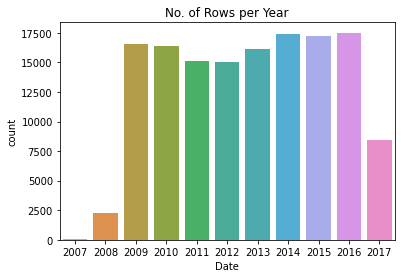

In [10]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(weather.Date).dt.year);

In [11]:
year=pd.to_datetime(weather.Date).dt.year

In [12]:
year

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145454    2017
145455    2017
145456    2017
145457    2017
145458    2017
Name: Date, Length: 142193, dtype: int64

In [13]:
train_df=weather[year<2015]
val_df=weather[year==2015]
test_df=weather[year>2015]

In [14]:
train_df.shape

(98988, 23)

In [15]:
val_df.shape

(17231, 23)

In [16]:
test_df.shape

(25974, 23)

In [17]:
input_col=list(train_df.columns)[1:-1]
target_col='RainTomorrow'

In [18]:
input_col

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [19]:
target_col

'RainTomorrow'

In [20]:
train_input=train_df[input_col].copy()
train_target=train_df[target_col].copy()

In [21]:
train_target.isna().sum()

0

In [22]:
val_input=val_df[input_col].copy()
val_target=val_df[target_col].copy()

In [23]:
test_input=test_df[input_col].copy()
test_target=test_df[target_col].copy()

In [24]:
numerical_col=train_input.select_dtypes(include=np.number).columns.tolist()

In [25]:
numerical_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [26]:
categorical_col=train_input.select_dtypes('object').columns.tolist()

In [27]:
categorical_col

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

## Imputing the missing values

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imp=SimpleImputer(strategy="mean").fit(weather[numerical_col])

In [30]:
train_input[numerical_col]=imp.transform(train_input[numerical_col])
val_input[numerical_col]=imp.transform(val_input[numerical_col])
test_input[numerical_col]=imp.transform(test_input[numerical_col])

## Scaling

In [31]:
train_input.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  98988.000000  98988.000000  98988.000000  98988.000000  98988.000000   
mean      12.002823     23.003328      2.372704      5.355452      7.611475   
std        6.331572      6.983092      8.475680      3.125083      2.907069   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      3.800000      7.500000   
50%       11.800000     22.400000      0.000000      5.469824      7.624853   
75%       16.600000     27.900000      0.800000      5.600000      9.200000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   98988.000000  98988.000000  98988.000000  98988.000000  98988.000000   
mean       40.213769     14.101045     18.768900     68.654275     51.501499   
std        13.226474      8.942506      8.826241     18.873780     20.618122   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     69.000000     52.000000   
75%        46.000000     19.000000     24.000000     83.000000     65.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  98988.000000  98988.000000  98988.000000  98988.000000  98988.000000   
mean    1017.530858   1015.149778      4.354706      4.447402     16.828607   
std        6.731053      6.660441      2.292363      2.136544      6.374509   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1013.400000   1010.900000      3.000000      3.000000     12.200000   
50%     1017.653758   1015.258204      4.437189      4.503167     16.600000   
75%     1021.800000   1019.300000      6.000000      6.000000     21.300000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  98988.000000  
mean      21.526705  
std        6.809602  
min       -5.100000  
25%       16.600000  
50%       21.000000  
75%       26.100000  
max       46.100000

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler().fit(weather[numerical_col])

In [34]:
scaler

MinMaxScaler()

In [35]:
train_input[numerical_col]=scaler.transform(train_input[numerical_col])
val_input[numerical_col]=scaler.transform(val_input[numerical_col])
test_input[numerical_col]=scaler.transform(test_input[numerical_col])

In [36]:
train_input.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  98988.000000  98988.000000  98988.000000  98988.000000  98988.000000   
mean       0.483557      0.525583      0.006395      0.036934      0.524929   
std        0.149330      0.132006      0.022845      0.021552      0.200488   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037723      0.525852   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   98988.000000  98988.000000  98988.000000  98988.000000  98988.000000   
mean        0.265223      0.108470      0.215734      0.686543      0.515015   
std         0.102531      0.068789      0.101451      0.188738      0.206181   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  98988.000000  98988.000000  98988.000000  98988.000000  98988.000000   
mean       0.612080      0.608796      0.483856      0.494156      0.506933   
std        0.111257      0.106567      0.254707      0.237394      0.134483   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614112      0.610531      0.493021      0.500352      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  98988.000000  
mean       0.516827  
std        0.130703  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

## Encoding categorical_col

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
encoder=OneHotEncoder(sparse=False,handle_unknown="ignore").fit(weather[categorical_col])


In [39]:
encoded_col=list(encoder.get_feature_names(categorical_col))

In [71]:
train_input[encoded_col] = encoder.transform(train_input[categorical_col])
val_input[encoded_col] = encoder.transform(val_input[categorical_col])
test_input[encoded_col] = encoder.transform(test_input[categorical_col])

In [41]:
test_input

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037723  0.525852   
2499     Albury  0.693396  0.725898  0.001078     0.037723  0.525852   
2500     Albury  0.634434  0.527410  0.005930     0.037723  0.525852   
2501     Albury  0.608491  0.538752  0.042049     0.037723  0.525852   
2502     Albury  0.566038  0.523629  0.018329     0.037723  0.525852   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037723  0.525852   
145455    Uluru  0.266509  0.533081  0.000000     0.037723  0.525852   
145456    Uluru  0.285377  0.568998  0.000000     0.037723  0.525852   
145457    Uluru  0.327830  0.599244  0.000000     0.037723  0.525852   
145458    Uluru  0.384434  0.601134  0.000000     0.037723  0.525852   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SSE  \
2498           ENE       0.372093        NaN        ESE  ...             0.0   
2499           SSE       0.341085        SSE         SE  ...             0.0   
2500           ENE       0.325581        ESE        ENE  ...             0.0   
2501           SSE       0.255814         SE        SSE  ...             1.0   
2502           ENE       0.193798         SE        SSE  ...             1.0   
...            ...            ...        ...        ...  ...             ...   
145454           E       0.193798        ESE          E  ...             0.0   
145455           E       0.193798         SE        ENE  ...             0.0   
145456         NNW       0.124031         SE          N  ...             0.0   
145457           N       0.240310         SE        WNW  ...             0.0   
145458          SE       0.170543        SSE          N  ...             0.0   

        WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
2498               0.0            0.0           0.0             0.0   
2499               0.0            0.0           0.0             0.0   
2500               0.0            0.0           0.0             0.0   
2501               0.0            0.0           0.0             0.0   
2502               0.0            0.0           0.0             0.0   
...                ...            ...           ...             ...   
145454             0.0            0.0           0.0             0.0   
145455             0.0            0.0           0.0             0.0   
145456             0.0            0.0           0.0             0.0   
145457             0.0            0.0           0.0             1.0   
145458             0.0            0.0           0.0             0.0   

        WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  \
2498               0.0             0.0           1.0            0.0   
2499               0.0             0.0           1.0            0.0   
2500               0.0             0.0           0.0            1.0   
2501               0.0             0.0           0.0            1.0   
2502               0.0             0.0           0.0            1.0   
...                ...             ...           ...            ...   
145454             0.0             0.0           1.0            0.0   
145455             0.0             0.0           1.0            0.0   
145456             0.0             0.0           1.0            0.0   
145457             0.0             0.0           1.0            0.0   
145458             0.0             0.0           1.0            0.0   

        RainToday_nan  
2498              0.0  
2499              0.0  
2500              0.0  
2501              0.0  
2502              0.0  
...               ...  
145454            0.0  
145455            0.0  
145456            0.0  
145457            0.0  
145458            0.0  

[25974 rows x 124 columns]

Lets drop the textual column

In [72]:
X_train=train_input[numerical_col+encoded_col]
X_val=val_input[numerical_col+encoded_col]
X_test=test_input[numerical_col+encoded_col]

In [43]:
X_train

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.037723  0.525852       0.294574   
1       0.375000  0.565217  0.000000     0.037723  0.525852       0.294574   
2       0.504717  0.576560  0.000000     0.037723  0.525852       0.310078   
3       0.417453  0.620038  0.000000     0.037723  0.525852       0.139535   
4       0.613208  0.701323  0.002695     0.037723  0.525852       0.271318   
...          ...       ...       ...          ...       ...            ...   
144548  0.599057  0.718336  0.000000     0.037723  0.525852       0.286822   
144549  0.556604  0.786389  0.000000     0.037723  0.525852       0.193798   
144550  0.608491  0.805293  0.000000     0.037723  0.525852       0.255814   
144551  0.674528  0.818526  0.000000     0.037723  0.525852       0.286822   
144552  0.731132  0.839319  0.000000     0.037723  0.525852       0.542636   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0           0.153846      0.275862         0.71         0.22  ...   
1           0.030769      0.252874         0.44         0.25  ...   
2           0.146154      0.298851         0.38         0.30  ...   
3           0.084615      0.103448         0.45         0.16  ...   
4           0.053846      0.229885         0.82         0.33  ...   
...              ...           ...          ...          ...  ...   
144548      0.184615      0.298851         0.22         0.13  ...   
144549      0.146154      0.229885         0.16         0.08  ...   
144550      0.200000      0.103448         0.15         0.08  ...   
144551      0.215385      0.195402         0.22         0.09  ...   
144552      0.230769      0.149425         0.16         0.09  ...   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0                  0.0             0.0            0.0           0.0   
1                  0.0             0.0            0.0           0.0   
2                  0.0             0.0            0.0           0.0   
3                  0.0             0.0            0.0           0.0   
4                  0.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
144548             1.0             0.0            0.0           0.0   
144549             0.0             0.0            1.0           0.0   
144550             1.0             0.0            0.0           0.0   
144551             0.0             1.0            0.0           0.0   
144552             0.0             1.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
0                  1.0             0.0             0.0           1.0   
1                  0.0             1.0             0.0           1.0   
2                  0.0             1.0             0.0           1.0   
3                  0.0             0.0             0.0           1.0   
4                  0.0             0.0             0.0           1.0   
...                ...             ...             ...           ...   
144548             0.0             0.0             0.0           1.0   
144549             0.0             0.0             0.0           1.0   
144550             0.0             0.0             0.0           1.0   
144551             0.0             0.0             0.0           1.0   
144552             0.0             0.0             0.0           1.0   

        RainToday_Yes  RainToday_nan  
0                 0.0            0.0  
1                 0.0            0.0  
2                 0.0            0.0  
3                 0.0            0.0  
4                 0.0            0.0  
...               ...            ...  
144548            0.0            0.0  
144549            0.0            0.0  
144550            0.0            0.0  
144551            0.0            0.0  
144552            0.0            0.0  

[98988 rows x 119 columns]

## Training and visualizing the decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model=DecisionTreeClassifier(random_state=42)

In [46]:
model.fit(X_train,train_target)

DecisionTreeClassifier(random_state=42)

In [47]:
model.score(X_train,train_target)

0.9999797955307714

In [48]:
model.score(X_val,val_target)

0.7921188555510418

In [49]:
model.score(X_test,test_target)

0.7741202741202741

In [50]:
## model is over fitting so we have to tune the model

## Visualizing the tree

In [51]:
from sklearn.tree import plot_tree,export_text

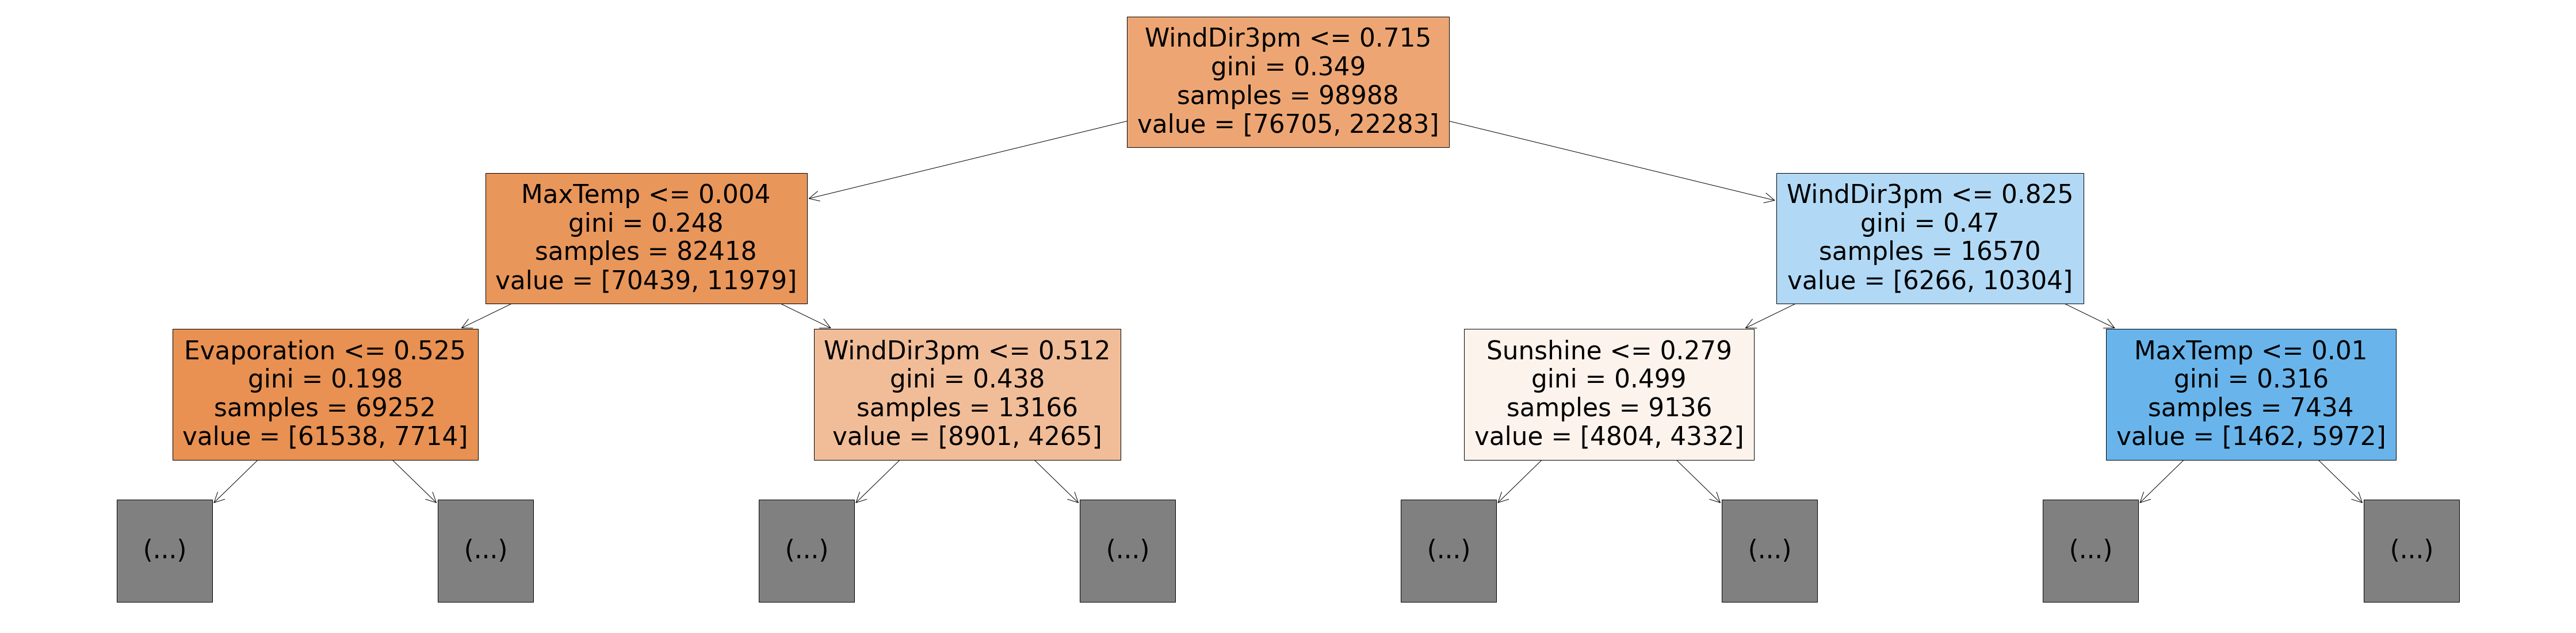

In [52]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=train_input.columns,max_depth=2,filled=True);

In [53]:
model.tree_.max_depth

48

In [54]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [55]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [56]:
important_feature=pd.DataFrame({
                        'names':X_train.columns,
                        'values':model.feature_importances_
}).sort_values('values',ascending=False)

In [57]:
important_feature.head(10)

names    values
9     Humidity3pm  0.261441
11    Pressure3pm  0.062057
2        Rainfall  0.059139
5   WindGustSpeed  0.056333
4        Sunshine  0.049465
8     Humidity9am  0.040218
14        Temp9am  0.035000
0         MinTemp  0.034894
10    Pressure9am  0.034415
1         MaxTemp  0.032361

In [58]:
px.histogram(important_feature.head(10),x='names',y='values',color_discrete_sequence=["green"],title="Important Feautures")

## HyperTuning and Overfitting

In [59]:
model.tree_.max_depth

48

In [60]:
def depth_finder(n):
    model=DecisionTreeClassifier(max_depth=n,random_state=42)
    model.fit(X_train, train_target)
    train_error=1-model.score(X_train,train_target)
    val_error=1-model.score(X_val,val_target)
    test_error=1-model.score(X_test,test_target)
    return{'max_depth':n,'train_error':train_error,"val_error":val_error,"test_error":test_error}

In [61]:
error_df=pd.DataFrame([depth_finder(n) for n in range(1,21)])

In [62]:
error_df

max_depth  train_error  val_error  test_error
0           1     0.184315   0.177935    0.191538
1           2     0.179547   0.172712    0.184107
2           3     0.170869   0.166560    0.176407
3           4     0.165707   0.164355    0.176754
4           5     0.160676   0.159074    0.171441
5           6     0.156271   0.157275    0.169670
6           7     0.153312   0.154605    0.168938
7           8     0.147806   0.158029    0.166474
8           9     0.140906   0.156578    0.167167
9          10     0.132945   0.157333    0.170594
10         11     0.123227   0.159248    0.170517
11         12     0.113489   0.160815    0.174713
12         13     0.101750   0.163833    0.178756
13         14     0.089981   0.167373    0.180026
14         15     0.078999   0.171261    0.187303
15         16     0.068180   0.174279    0.187380
16         17     0.058138   0.176890    0.192693
17         18     0.048733   0.181243    0.194233
18         19     0.040025   0.187569    0.201086
19         20     0.032539   0.190297    0.205783

In [63]:
px.histogram(error_df,x="train_error",color="max_depth")

From this graph what we understood that train data is not more than the depth of great of 7 so we are actaually checking the depth 7 with our model score.

In [64]:
depth_finder(7)

{'max_depth': 7,
 'train_error': 0.1533115125065665,
 'val_error': 0.15460507225349662,
 'test_error': 0.16893816893816893}

In [65]:
## Leaf node method

In [66]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [67]:
model.fit(X_train, train_target)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [68]:
model.score(X_val, val_target)

0.8442342290058615

In [69]:
model.tree_.max_depth

12

In [70]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

## Random Forest classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
model=RandomForestClassifier(n_jobs=-1,random_state=42)

In [76]:
model.fit(X_train,train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [77]:
model.score(X_train,train_target)

0.9999494888269285

In [78]:
model.score(X_val,val_target)

0.8566537055307295

Without doing any hyper tuning we got better model in random forest classifier

In [80]:
model.predict_proba(X_train)

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [83]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

In [84]:
len(model.estimators_)

100

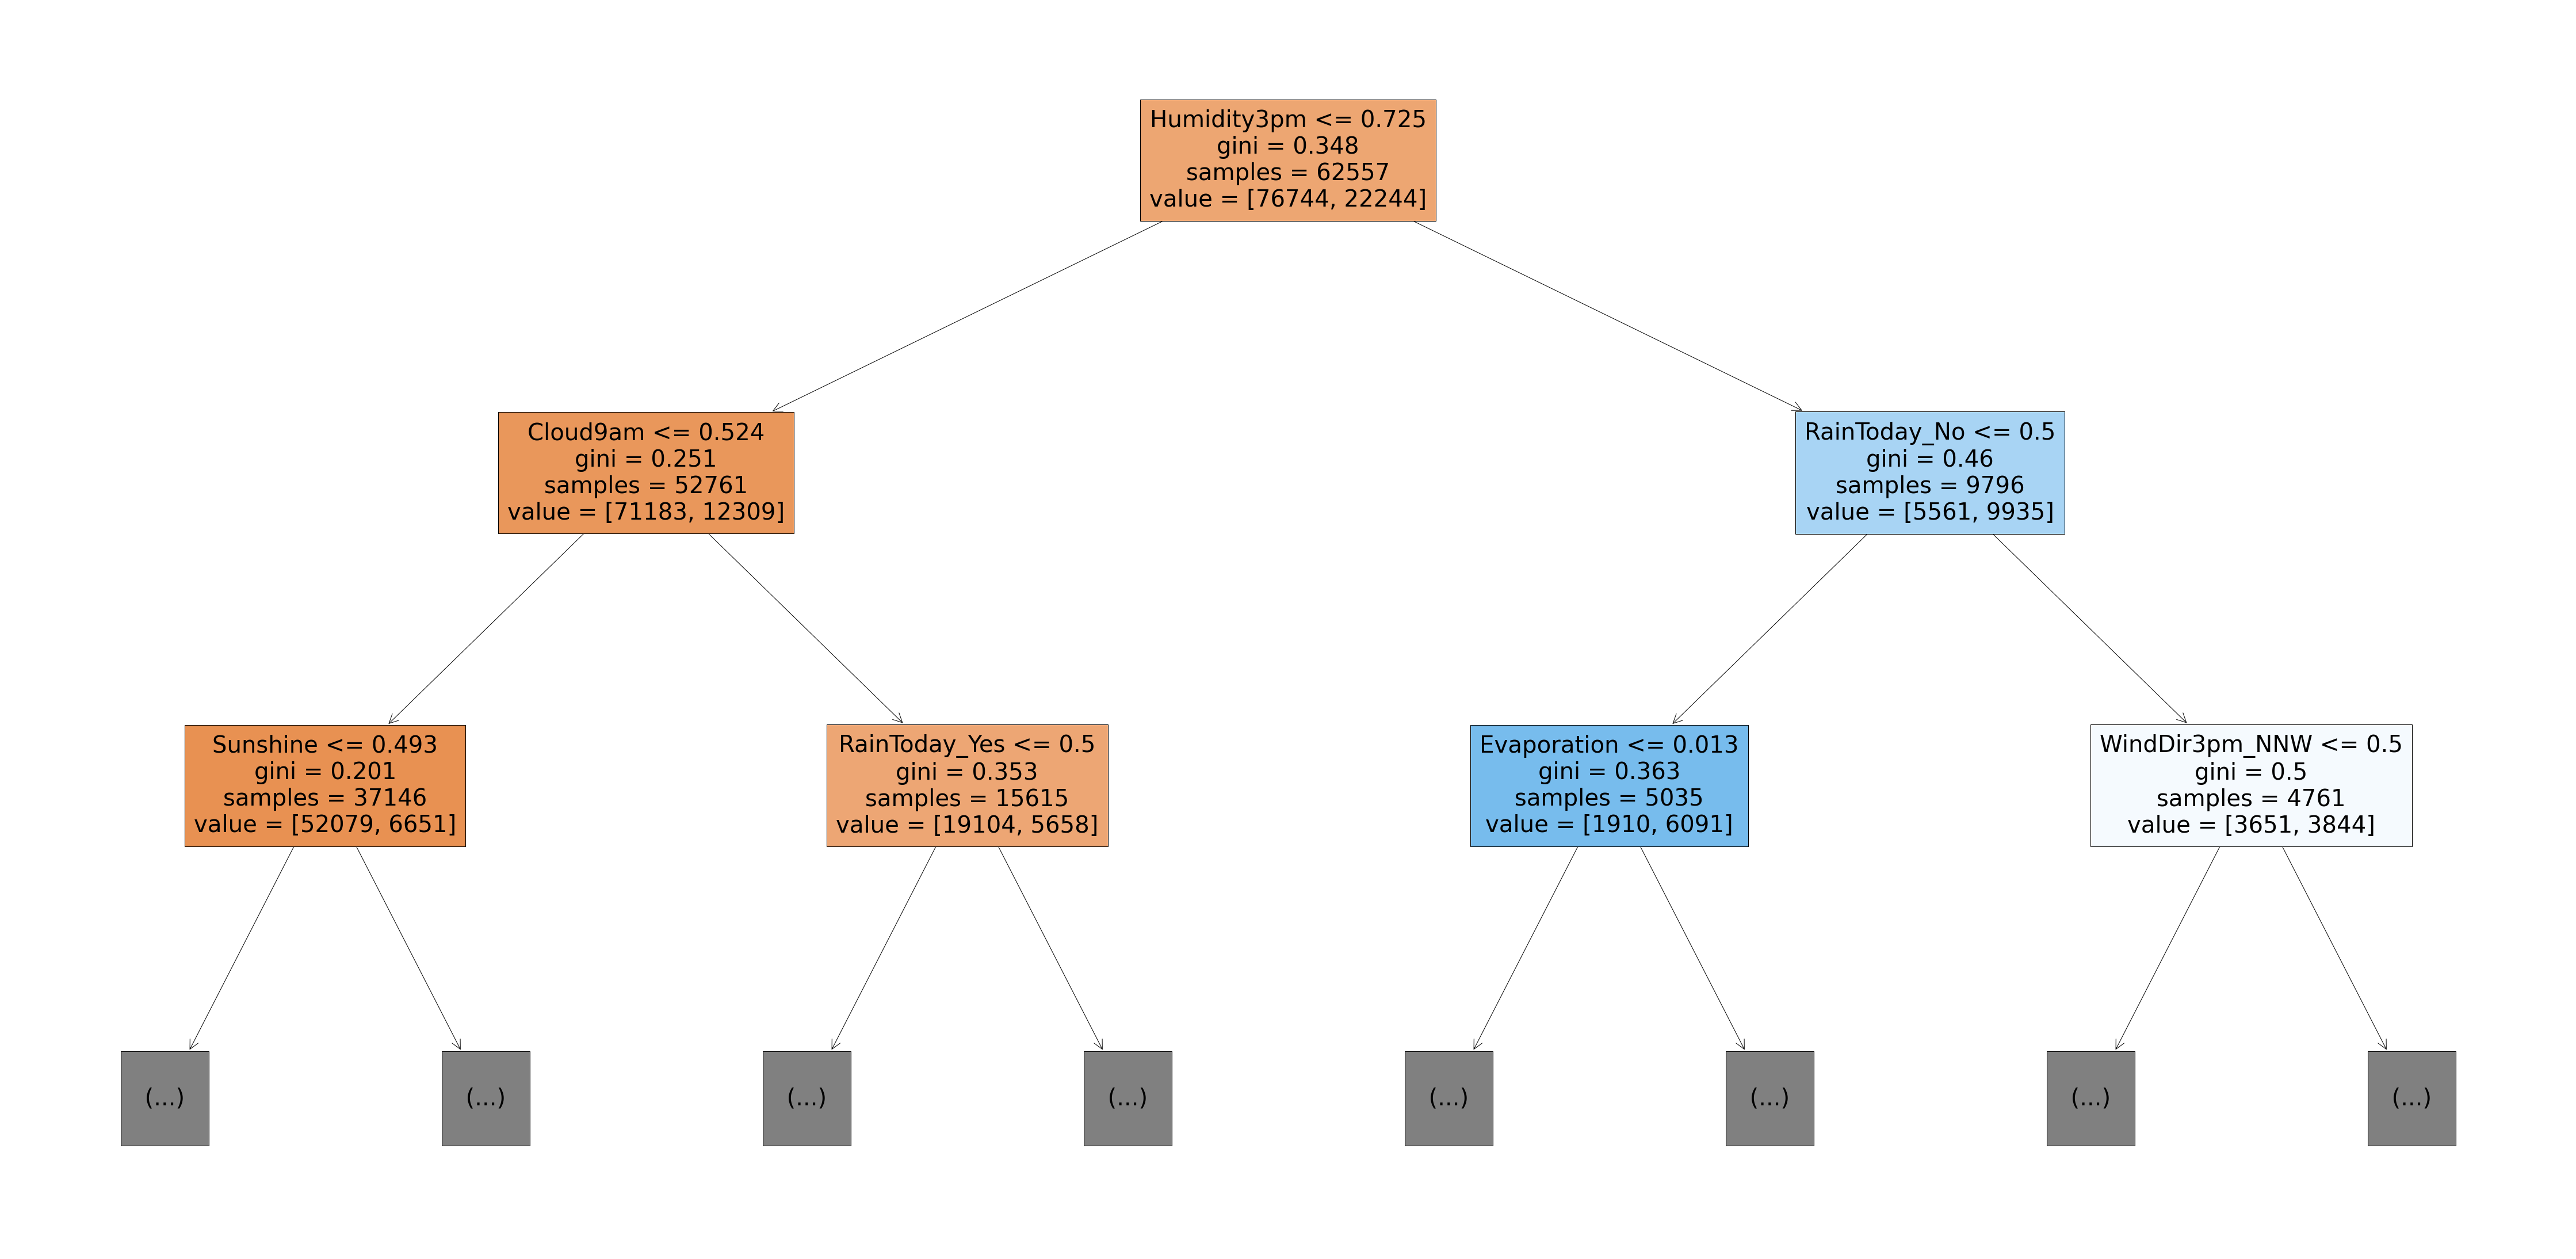

In [91]:
plt.figure(figsize=(80,40))
plot_tree(model.estimators_[2],feature_names=X_train.columns,max_depth=2,filled=True);

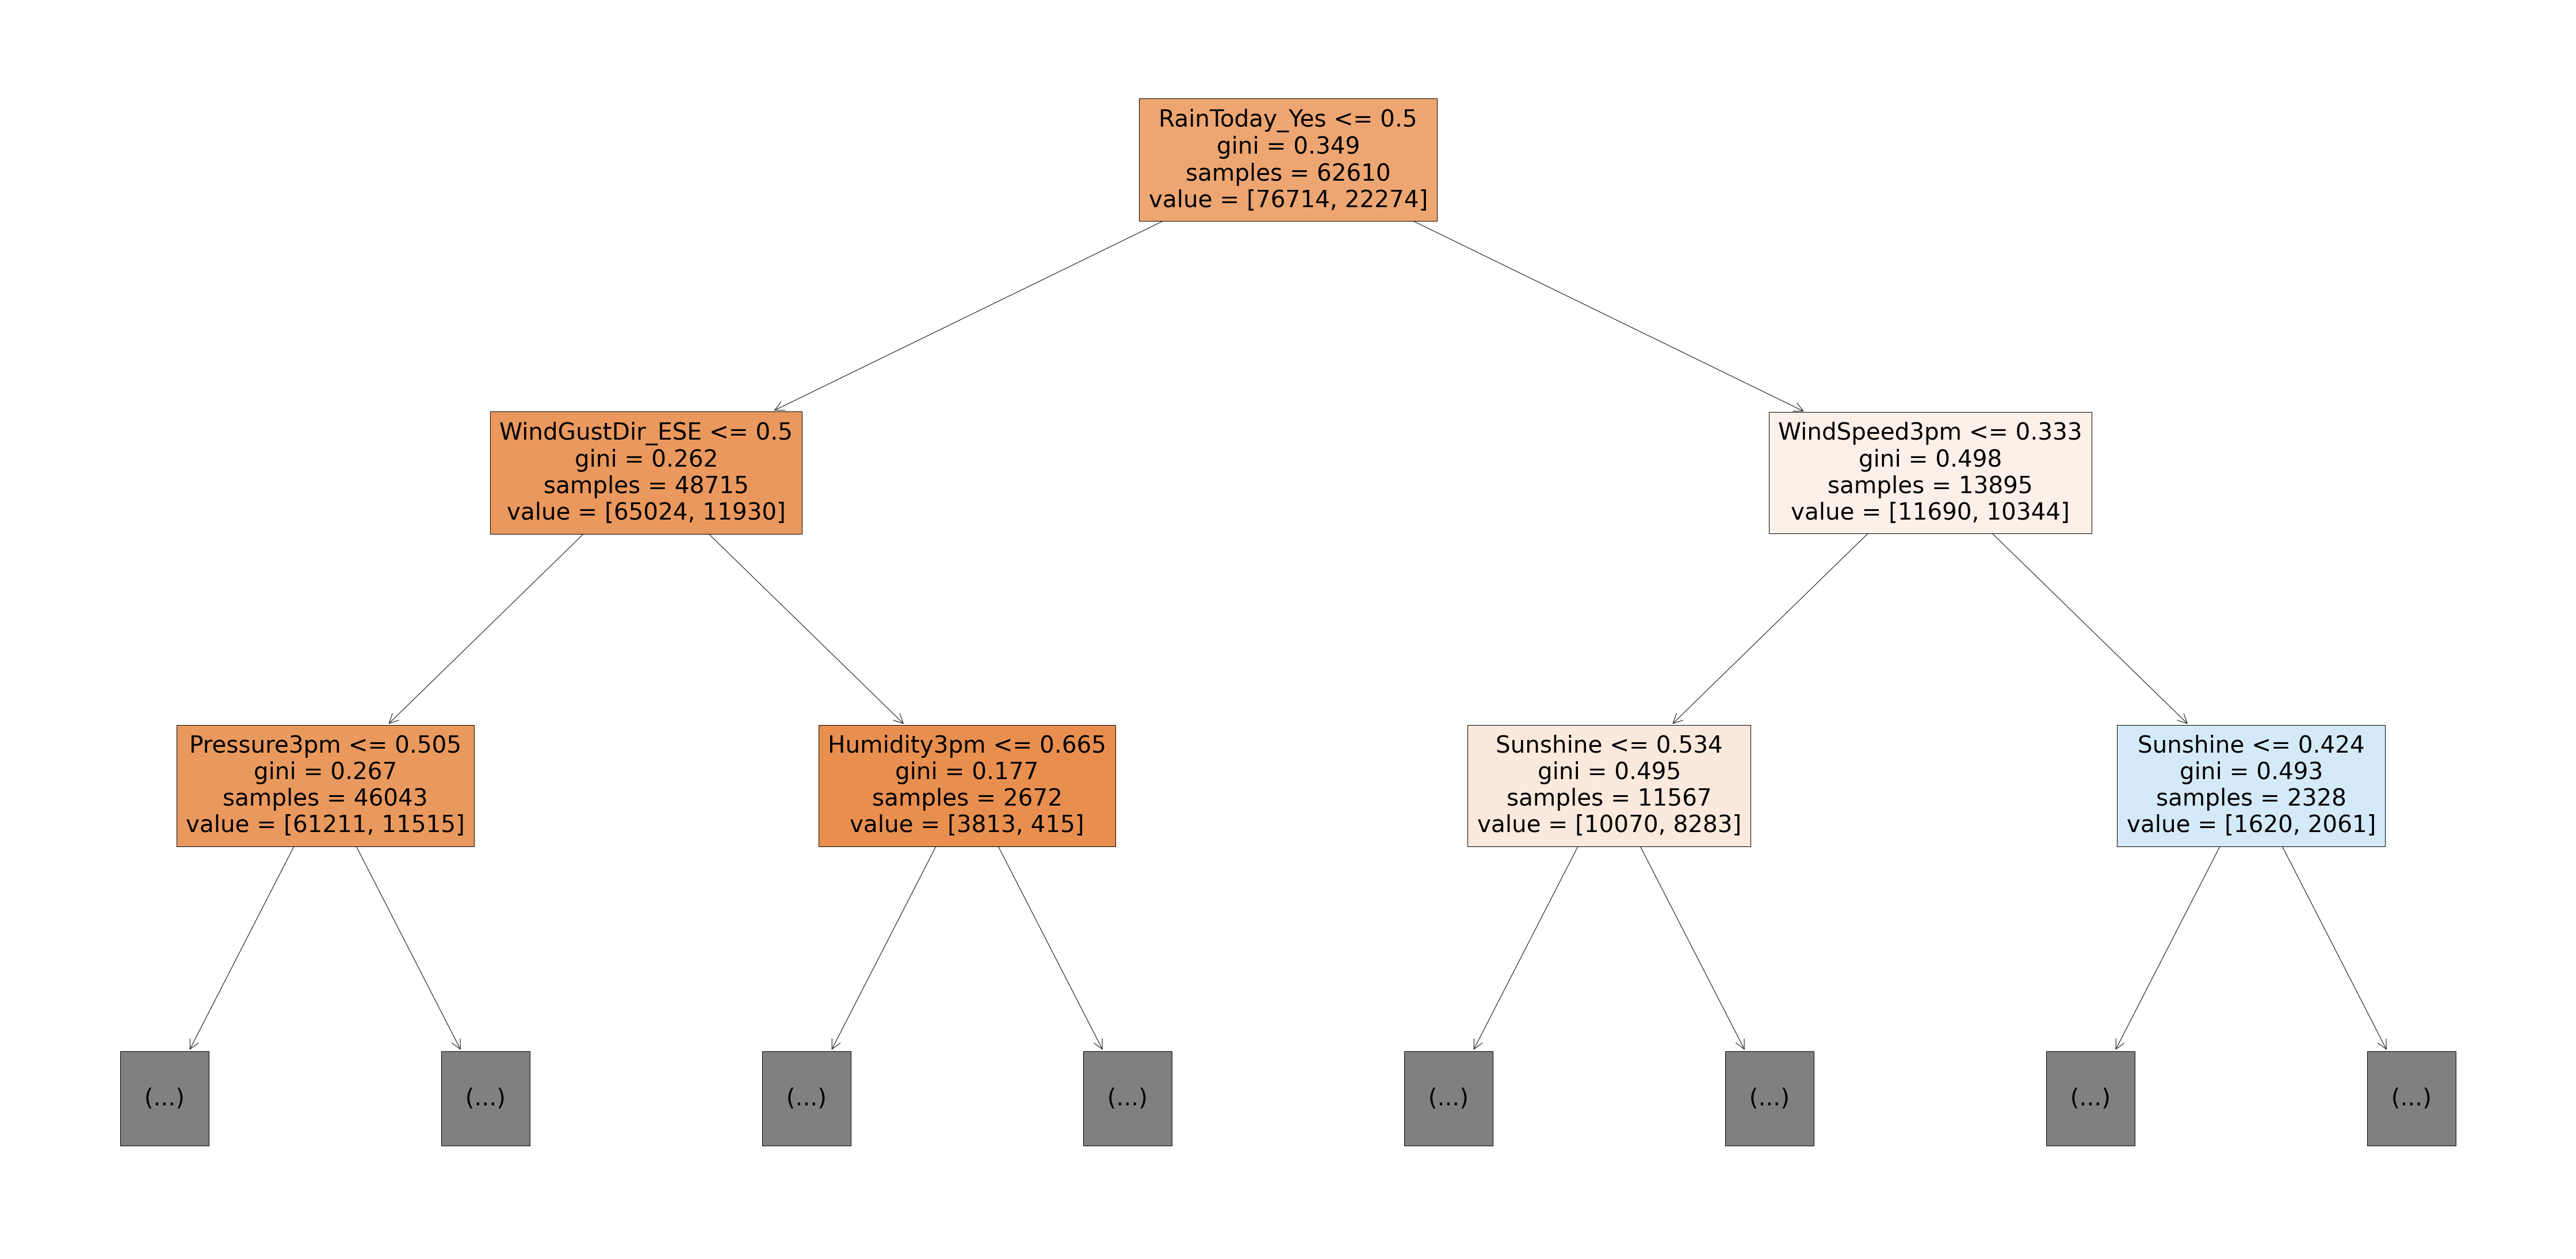

In [95]:
plt.figure(figsize=(80,40))
plot_tree(model.estimators_[20],feature_names=X_train.columns,max_depth=2,filled=True);

In [96]:
# What we see is differnt tree contain different decision algorithms

In [105]:
importance=pd.DataFrame({'names':X_train.columns,
                         'importance':model.feature_importances_}).sort_values("importance",ascending=False)

In [106]:
importance

names  importance
9             Humidity3pm    0.139904
4                Sunshine    0.053696
11            Pressure3pm    0.052713
8             Humidity9am    0.050051
2                Rainfall    0.048077
..                    ...         ...
55    Location_Townsville    0.000702
19  Location_AliceSprings    0.000607
41          Location_Nhil    0.000544
32     Location_Katherine    0.000287
57         Location_Uluru    0.000238

[119 rows x 2 columns]

In [107]:
importance.head(10)

names  importance
9     Humidity3pm    0.139904
4        Sunshine    0.053696
11    Pressure3pm    0.052713
8     Humidity9am    0.050051
2        Rainfall    0.048077
10    Pressure9am    0.047944
5   WindGustSpeed    0.047477
15        Temp3pm    0.044379
1         MaxTemp    0.041865
0         MinTemp    0.041199

<AxesSubplot:xlabel='importance', ylabel='names'>

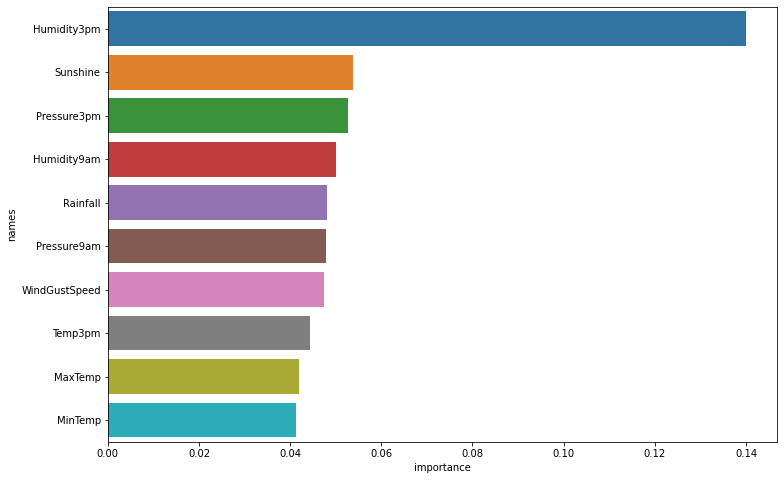

In [112]:
plt.figure(figsize=(12,8))
sns.barplot(data=importance.head(10),y='names',x="importance")

## Hyper parameter tuning with Random forest

In [114]:
base_model=RandomForestClassifier(n_jobs=-1,random_state=42).fit(X_train,train_target)

In [122]:
train_score=base_model.score(X_train,train_target)
val_score=base_model.score(X_val,val_target)

In [126]:
base_score=train_score,val_score

In [127]:
base_score

(0.9999494888269285, 0.8566537055307295)

In [128]:
# n-estimator-default it's 100

In [136]:
model=RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators=10).fit(X_train,train_target)

In [137]:
model

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [138]:
model.score(X_train,train_target)

0.986958015112943

In [139]:
model.score(X_val,val_target)

0.8485868492832686

In [140]:
base_score

(0.9999494888269285, 0.8566537055307295)

lets increase  the size of the forest

In [142]:
model=RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators=500).fit(X_train,train_target)

In [144]:
model.score(X_train,train_target)

0.9999797955307714

In [145]:
model.score(X_val,val_target)

0.8577563693343393

In [146]:
base_score

(0.9999494888269285, 0.8566537055307295)

In [147]:
#Model will perform slightly better than the base score

In [148]:
#max_depth and max_leaf node

In [149]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_target)
    return model.score(X_train, train_target), model.score(X_val, val_target)

In [150]:
test_params(max_depth=5)

(0.8197862367155615, 0.8240961058557251)

In [151]:
test_params(max_depth=50)

(0.9999292843576999, 0.8565956705936975)

In [152]:
test_params(max_leaf_nodes=32)

(0.8314341132258456, 0.833904010214149)

In [153]:
test_params(max_leaf_nodes=128)

(0.8457388774396897, 0.842028901398642)

In [154]:
test_params(max_leaf_nodes=2**20)

(0.9999494888269285, 0.8556671116011839)

In [155]:
base_score

(0.9999494888269285, 0.8566537055307295)

In [157]:
# max_feature

In [159]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

Its has 119 feature usually it is sqr noot we have to change it to other feature based on the requirements

In [162]:
test_params(max_features='log2')

(0.9999595910615429, 0.8558992513493123)

In [163]:
test_params(max_features=3)

(0.9999494888269285, 0.8543323080494458)

In [164]:
test_params(max_features=7)

(0.9999595910615429, 0.8549126574197667)

In [165]:
base_score

(0.9999494888269285, 0.8566537055307295)

In [166]:
#Min_sample_split and Min leaf split

In [167]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9625005051117307, 0.8565956705936975)

In [168]:
test_params(min_samples_split=100, min_samples_leaf=3)

(0.8695397421909726, 0.8514305611978411)

In [169]:
base_score

(0.9999494888269285, 0.8566537055307295)

In [170]:
#Min impurity decrease

In [171]:
test_params(min_impurity_decrease=1e-7)

(0.9996060128500425, 0.8561313910974406)

In [172]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [173]:
base_score

(0.9999494888269285, 0.8566537055307295)

In [174]:
# Boot strap and max_samples

In [175]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [176]:
base_score

(0.9999494888269285, 0.8566537055307295)

In [177]:
test_params(max_samples=0.9)

(0.9997676486038711, 0.8565376356566653)

In [178]:
#Not taking every set take particular percerntage

In [ ]:
#Model classes

In [179]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [180]:
test_params(class_weight='balanced')

(0.9999494888269285, 0.8543903429864779)

In [181]:
test_params(class_weight={'No': 1, 'Yes': 2})

(0.9999595910615429, 0.8558412164122802)

In [182]:
base_score

(0.9999494888269285, 0.8566537055307295)

In [183]:
#Put it together

In [184]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [186]:
model.fit(X_train, train_target)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [188]:
model.score(X_train, train_target), model.score(X_val, val_target)

(0.9920192346547057, 0.8563054959085369)

In [189]:
base_score

(0.9999494888269285, 0.8566537055307295)

In [190]:
model.score(X_test,test_target)

0.8451913451913452

We many also check the steps of above mentioned

In [197]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numerical_col] = imp.transform(input_df[numerical_col])
    input_df[numerical_col] = scaler.transform(input_df[numerical_col])
    input_df[encoded_col] = encoder.transform(input_df[categorical_col])
    X_input = input_df[numerical_col + encoded_col]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [198]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [202]:
import warnings

warnings.filterwarnings('ignore')

In [203]:
predict_input(model, new_input)

('Yes', 0.7608595348304203)